In [1]:
# Object Detection에 대한 간단한 예제부터 한번 살펴보아요!

import tensorflow as tf
import tensorflow_hub as tfhub
import matplotlib.pyplot as plt

# 이미지 경로부터 설정해요!
img_path = 'file:////content/drive/MyDrive/[빅데이터 과정 공유폴더]/data/object-detection/sample-seoul.jpeg'

# 이미지 File객체를 생성해요!(이미지 다운로드 개념)
img = tf.keras.utils.get_file(origin=img_path)

# 이렇게 가져온 File 객체에서 데이터를 읽어들여요
img = tf.io.read_file(img)

# 읽어온 데이터를 jpg이미지 pixel데이터로 다시 변환
img = tf.image.decode_jpeg(img, channels=3)

# dtype을 정규화된 실수로 변환
img = tf.image.convert_image_dtype(img, tf.float32)
print(img.shape, type(img))  # (1484, 2713, 3)

# 4차원 형태로 shape을 변경
img_input = tf.expand_dims(img,0)
print(img_input.shape)  # (1, 1484, 2713, 3)

# 데이터가 준비되었어요!
# Object Detection을 하기 위해 Pretrained Model을 다운받아야 해요!

model = tfhub.load('https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1')

(1484, 2713, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>
(1, 1484, 2713, 3)


In [2]:
print(model.signatures.keys())

object_detector = model.signatures['default']

result = object_detector(img_input)
# object 100개를 찾아요!

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(*, images) at 0x7E7EA1DD9090>}))


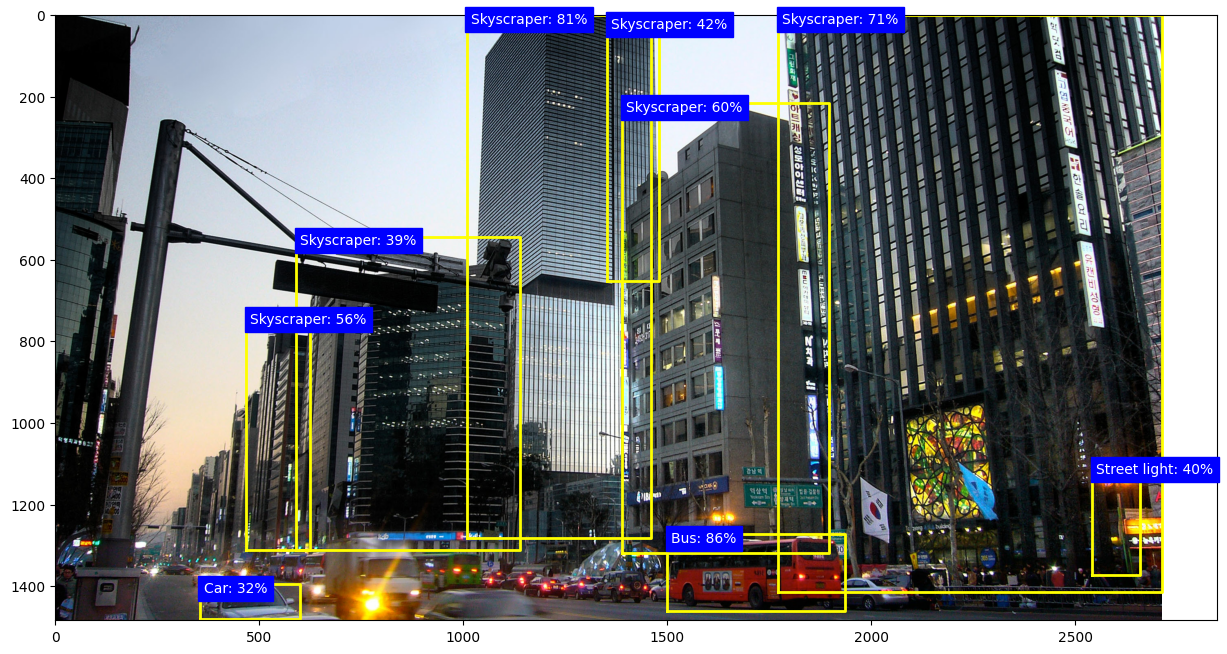

In [3]:
boxes = result['detection_boxes']   # 좌표값
# print(boxes.shape, boxes)  # (100, 4)

labels = result['detection_class_entities'] # 분류 예측 값
scores = result['detection_scores'] # 신뢰도(score)

# 샘플 이미지의 가로, 세로 크기
img_height, img_width = img.shape[0], img.shape[1]

# 탐지할 최대 객체의 수
obj_to_detect = 10

# 시각화
plt.figure(figsize = (15,10))

for i in range(min(obj_to_detect, boxes.shape[0])):

    if scores[i] > 0.3:
        (ymax, xmin, ymin, xmax) = (boxes[i][0] * img_height, boxes[i][1] * img_width,
                                    boxes[i][2] * img_height, boxes[i][3] * img_width)
        plt.imshow(img)
        plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin],
                 color='yellow', linewidth=2)
        class_name = labels[i].numpy().decode('utf-8')
        infer_score = int(scores[i].numpy()*100)
        annotation = '{}: {}%'.format(class_name, infer_score)
        plt.text(xmin+10, ymax+20, annotation,
                 color='white', backgroundcolor='blue', fontsize=10)